# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import os
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Read data and print samples

In [2]:
data_train = pd.read_csv('./data/datatrain.csv')
data_test = pd.read_csv('./data/datatest.csv')

In [3]:
print('==============================Data Train==============================')
data_train.head(10)

==============================Data Train==============================


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
1,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
3,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
4,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
5,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
6,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
7,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
8,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
9,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [4]:
print('==============================Data Test==============================')
data_test.head(10)

==============================Data Test==============================


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
5,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
6,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
7,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
8,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
9,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


# Preprocess

## Select train columns and test column

In [5]:
X_train = data_train.drop('date', axis=1).drop('Occupancy', axis=1)
X_test = data_test.drop('date', axis=1).drop('Occupancy', axis=1)

y_train = data_train['Occupancy']
y_test = data_test['Occupancy']

In [6]:
print(f'Amount data train: {len(X_train)}')
print(f'Amount data test: {len(X_test)}')

Amount data train: 17895
Amount data test: 2665


## Standardize data

In [7]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std = X_train_std.astype('float32')
X_test_std = scaler.transform(X_test)
X_test_std = X_test_std.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Neural Network

## Create model

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_std.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train model

In [10]:
history = model.fit(X_train_std, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


448/448 [==============================] - 2s 2ms/step - loss: 0.0906 - accuracy: 0.9799 - val_loss: 0.0442 - val_accuracy: 0.9947
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9888 - val_loss: 0.0324 - val_accuracy: 0.9947
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.0407 - val_accuracy: 0.9939
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9895 - val_loss: 0.0309 - val_accuracy: 0.9947
Epoch 5/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9894 - val_loss: 0.0328 - val_accuracy: 0.9947
Epoch 6/10
448/448 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9897 - val_loss: 0.0306 - val_accuracy: 0.9947
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0312 - val_accuracy: 0.9947
Epoc

## Test model

In [11]:
y_pred_proba = model.predict(X_test_std)
y_pred = (y_pred_proba > 0.5).astype(int)

84/84 [==============================] - 0s 1ms/step


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


## Evaluate model

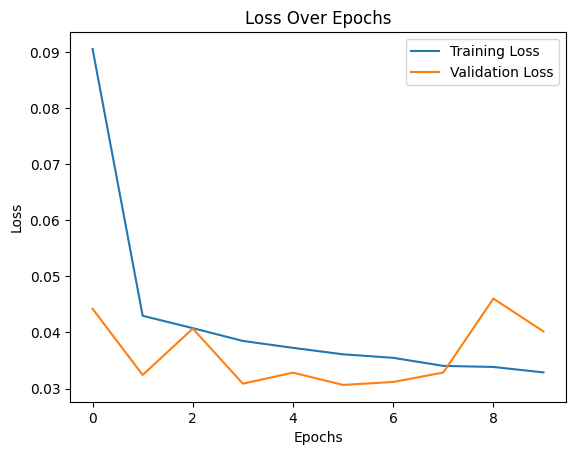

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

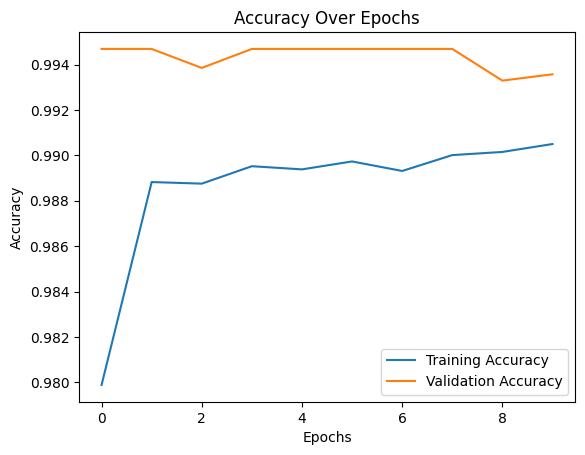

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save model

In [15]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets


# SVM

## Train model

In [16]:
svm_model = SVC(kernel='linear', verbose=True)
history = svm_model.fit(X_train_std, y_train)

[LibSVM]

## Test model

In [17]:
y_pred = svm_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


# Logistic Regression

## Train model

In [18]:
classifier = LogisticRegression()
classifier.fit(X_train_std, y_train)

LogisticRegression()

## Test model

In [19]:
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.3647279549718574


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
